# Gender representation analysis of Stack Overflow developer survey 2021


Since 2011, Stack Overflow Annual Developer Survey tries to capture the current state of professional and enthusiast programmers' community by covering a range of questions regarding the education, experience, favourite programming software etc.

This project is focused on analysing the demographic aspect of the survey, specifically the gender representation and some of the main distinction areas between genders within the coding realm.

Three **key questions** this project will focus on are:
>**1.** What is the profile of gender representation in 2021 and are there any identifiable trends when compared to the surveys from the 2017-2021 period?
>
>**2.** Is the engagement of different genders in various coding-related communities the same of does it vary?
>
>**3.** Do different genders develop interest in coding at the same age or is there a noticeable difference?      

#### Setting up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import re
%matplotlib inline

#uncomment if on laptop 1
#df = pd.read_csv('./Stackoverflow survey 2021/survey_results_public.csv')
#schema = pd.read_csv('./Stackoverflow survey 2021/survey_results_schema.csv')

#uncomment if on laptop 2
df = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_public.csv')
schema = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_schema.csv')

In [2]:
schema.head(5) 

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [3]:
df.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN




File 'survey_results_schema.csv' contains a full list of questions and the name of column within the file with survey results 'survey_results_public.csv'.

After previewing first couple of entries in both **schema** and the main **df** dataframe, it is evident the 'question' column within schema contains entries with additional formatting snippets of code such as '< div >< span style="font-size:19px;">< strong> ' which makes it hard to read and could use a bit of cleaning.

Two functions below are to remove all formatting tags and to callout the full question when given the column name.

In [4]:
def remove_tags(string): #removes formatting tags from strings
    '''
    INPUT - string - string containg formatting tags
    OUTPUT - 
            result - string without any formatting tags
    '''
    #patterns =['<.*?>','\n','*']
    result = re.sub('<.*?>|\n|\*','',string)
    #result = re.sub('<.*?>|\n','',string)   
    return result

schema['question_cleaned']=schema['question'].apply(lambda cw : remove_tags(cw))


def get_description(column_name, schema=schema):
    '''
    INPUT - column_name - string, the name of the column you would like to know about
            schema - pandas dataframe with the schema of the developers survey
            
    OUTPUT - desc - string, the description of the column
    '''
    desc = list(schema[schema['qname'] == column_name]['question_cleaned'])#[0]
    return desc

In [5]:
pd.options.display.max_colwidth = 120
schema[['qname','question_cleaned']][3:].head(5)

,qname,question_cleaned
3,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
4,Employment,Which of the following best describes your current employment status?
5,Country,Where do you live?
6,US_State,In which state or territory of the USA do you live? This information will be kept private.
7,UK_Country,In which part of the United Kingdom do you live? This information will be kept private.


In [6]:
get_description('Employment')

['Which of the following best describes your current employment status?']

#### Cleaning the data

In [7]:
df.columns #looking at the 

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

For the key questions outlined at the start of this notebook, the survey columns worth focusing on are **Gender, Age, Age1stCode, YearsCode, SOComm and NEWOtherComms**. 

The missing values in 'Gender' column can be filled in with the 'Prefer not to say' as there is no information on the gender of the respondent. With this approach, the sample size remains unchanged, and the NaN values will be accounted for when calculating gender representation.

Looking at the list of answers for Gender and YearsCode, it is clear the survey questions were formatted as multiple choice (Gender) and free-form answer (YearsCode) questions.

Two functions below are defined to group different answers into corresponding category/range.

In [8]:
df['Gender'].isna().sum()

1153

In [9]:
df['Gender'].fillna('Prefer not to say', inplace=True)
df['Gender'].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      2595
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [10]:
df['YearsCode'].value_counts()

5                     6190
10                    6067
6                     5565
4                     5049
7                     4940
8                     4714
3                     4449
15                    3625
20                    3419
2                     3342
12                    3188
9                     3009
11                    2344
13                    2016
25                    1984
14                    1813
1                     1695
30                    1660
16                    1491
Less than 1 year      1489
18                    1386
17                    1331
35                    1007
22                     941
21                     863
40                     830
23                     811
19                     659
24                     639
26                     533
27                     492
28                     455
38                     361
32                     331
37                     329
33                     309
34                     268
3

In [11]:
def gender_iden(gender_str):
    '''
    INPUT
        gender_str - a string of one of the values from the Gender column
    
    OUTPUT
        return 0 if the string is  in ("Prefer not to say")
        return 1 if the string is  in ("Men")
        return 2 if the string is  in ("Women")
        
        return 3 otherwise, this case will group toghther all answers that contain 'Non-binary, genderqueer, or gender non-conforming' along with additional user selection
    
    '''
    if gender_str=="Prefer not to say":
        return 0
    elif gender_str=="Man" or gender_str== "Male":
        return 1
    elif gender_str=="Woman" or gender_str=="Female":
        return 2
    else:
        return 3


def years_code_grp(yearscode_str):
    '''
    INPUT
        yearscode_str - a string of one of the values from the YearsCode column
    
    OUTPUT
        return one of the values 'Less than 1 year', '1 - 5 years', '6 - 10 years', '11 - 20 years', '21 - 50 years','More than 50 years'
    
    '''

    try:
        years=int(yearscode_str)
        if years in range(1,6): res='1 - 5 years'
        elif years in range(6,11): res='6 - 10 years'
        elif years in range(11,21): res='11 - 20 years'    
        else: res='21 - 50 years'
        return res
    except: return yearscode_str

Creating new columns within the main **df** dataframe that correspond to the grouped values from Gender and YearsCode.

In [12]:
df['GenderIdentity'] = df['Gender'].apply(gender_iden)
df['GenderIdentity'].value_counts()

1    74817
2     4120
0     2595
3     1907
Name: GenderIdentity, dtype: int64

In [13]:
df['YearsCodeGrouped'] = df['YearsCode'].apply(years_code_grp)
df.YearsCodeGrouped.value_counts()

6 - 10 years          24295
11 - 20 years         21272
1 - 5 years           20725
21 - 50 years         13690
Less than 1 year       1489
More than 50 years      170
Name: YearsCodeGrouped, dtype: int64

### 1. Gender representation

In [14]:
df['GenderIdentity'].value_counts()/df.shape[0]*100

1    89.666703
2     4.937739
0     3.110056
3     2.285502
Name: GenderIdentity, dtype: float64

Based on the above calculation, **89.7%** of survey respondents identify as Men, **4.9%** as Women and **3.1%** and Non-binary, genderqueer, or gender non-conforming.

Unsurprisingly, men make up most of the coding world (that is if we assume the survey captured the representative sample of the wider coding community), but has the gender representation changed over the years?

To answer this question, let us look at the gender distribution of survey respondents for the 2017-2021 period. 

In [15]:
df_full=pd.DataFrame()
for year in range(2017,2022):
    df_temp = pd.read_csv('./stack-overflow-developer-survey-'+str(year)+'/survey_results_public.csv',low_memory=False)
    #schema = pd.read_csv('./stack-overflow-developer-survey-'+str(year)+'/survey_results_schema.csv',low_memory=False)
    df_temp['Year']=year
    df_temp['YearRespCount']=df_temp.shape[0]
    df_full=df_full.append(df_temp[['Year','YearRespCount','Gender']], ignore_index=True)

The function above reads in the survey results file for the corresponding value of the **year** variable and appends only the **Gender** column to the main dataframe **df_full** that will be used in the gender representation analysis. To be able to distinguish responses from different years, an additional column called **Year** is added to the dataframe.

Next, the missing data in the Gender column is replaced by the 'Prefer not to say' value and mapped to the corresponding GenderIdentity code.

In [16]:
df_full['Gender'].isna().sum()

69265

In [17]:
df_full['Gender'].fillna('Prefer not to say', inplace=True)
#df_full['Gender'].value_counts()

In [18]:
df_full['GenderIdentity'] = df_full['Gender'].apply(gender_iden)
df_full['GenderIdentity'].value_counts()

1    289796
0     70707
2     20933
3      5594
Name: GenderIdentity, dtype: int64

In [19]:
df_full.head(5)

,Year,YearRespCount,Gender,GenderIdentity
0,2017,51392,Male,1
1,2017,51392,Male,1
2,2017,51392,Male,1
3,2017,51392,Male,1
4,2017,51392,Prefer not to say,0


For easy comparison of gender representation of survey respondents over the years, **df_full_grp** dataframe is grouped by Year and GenderIdentity and a new column 'GenderIdentityPerc' represents a percentage of respondents who identify themselves with a certain gender identity.

In [20]:
df_full_grp=df_full.groupby(['Year','YearRespCount','GenderIdentity']).count().reset_index()
df_full_grp.rename(columns={'Gender':'GenderIdentityCount'}, inplace=True)
df_full_grp['GenderIdentityPerc']=df_full_grp['GenderIdentityCount']/df_full_grp['YearRespCount']
df_full_grp.style.format({'GenderIdentityPerc': '{:,.2%}'.format,})

,Year,YearRespCount,GenderIdentity,GenderIdentityCount,GenderIdentityPerc
0,2017,51392,0,16345,31.80%
1,2017,51392,1,31589,61.47%
2,2017,51392,2,2600,5.06%
3,2017,51392,3,858,1.67%
4,2018,98855,0,34386,34.78%
5,2018,98855,1,59458,60.15%
6,2018,98855,2,4025,4.07%
7,2018,98855,3,986,1.00%
8,2019,88883,0,3477,3.91%
9,2019,88883,1,77919,87.66%


Pivoting the table for a clearer view of the data and plotting the line charts to visualise the results.

In [21]:
df_full_grpiv=df_full_grp.pivot_table(index='Year', columns='GenderIdentity',values='GenderIdentityPerc').reset_index()
df_full_grpiv.columns=['Year','_', 'Men','Women','NB-GQ-NC-TG' ]
#df_full_grpiv.rename(columns={'Year':'Year','0':'NDA','1':'Men', '2':'Women', '3':'NB-GQ-NC-TG' }, inplace=True)
#df_full_grpiv.set_index('Year', inplace=True)
df_full_grpiv.style.format({'_': '{:,.2%}'.format,'Men': '{:,.2%}'.format,'Women': '{:,.2%}'.format,'NB-GQ-NC-TG': '{:,.2%}'.format,})
#type(df_full_grpiv)
#df_full_grpiv

,Year,_,Men,Women,NB-GQ-NC-TG
0,2017,31.80%,61.47%,5.06%,1.67%
1,2018,34.78%,60.15%,4.07%,1.00%
2,2019,3.91%,87.66%,7.14%,1.29%
3,2020,21.57%,71.38%,5.96%,1.09%
4,2021,3.11%,89.67%,4.94%,2.29%


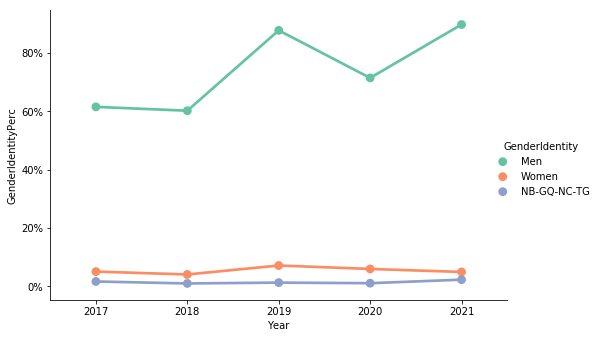

In [22]:
g=sns.catplot(x='Year', y='GenderIdentityPerc', hue='GenderIdentity', data=df_full_grp[df_full_grp['GenderIdentity']!=0], kind='point', height=4.8, aspect=1.5, palette='Set2', facet_kws={'legend_out':True})

labels_lst=['Men','Women','NB-GQ-NC-TG']
for t,l in zip(g._legend.texts, labels_lst):
    t.set_text(l)
    
    #plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', title=False, frameon=False)#.get_texts()[0].set_text('Men')   
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))


Based on the above graph, **the participation of female as well as NB-GQ-NC-TG (non-binary, gender queer, non-conforming and transgender) coders in the Stack Overflow's annual developer's survey has been stagnating**. Yearly changes cannot be described as either significant increase or decreases in representation as they oscillate in the range of  <span>&#177;</span>1.5%.

The only significant yearly changes are in the participation of male survey respondents. When looking into the survey entries without disclosed gender (entries with missing values and 'Prefer not to say') shown in the graph below, a direct correlation between the two groups is identifiable.

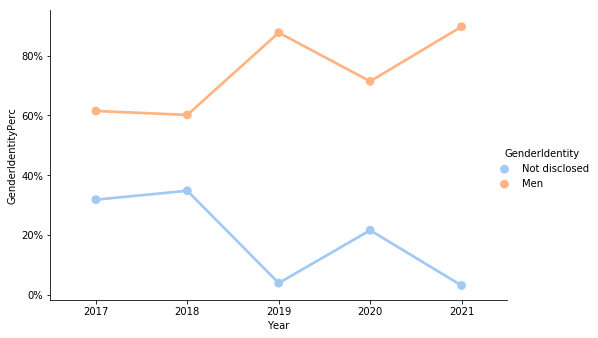

In [23]:
g=sns.catplot(x='Year', y='GenderIdentityPerc', hue='GenderIdentity', data=df_full_grp[df_full_grp['GenderIdentity']<2], kind='point', height=4.8, aspect=1.5,palette='pastel', facet_kws={'legend_out':True})

labels_lst2=['Not disclosed','Men']
for t,l in zip(g._legend.texts, labels_lst2):
    t.set_text(l)
    
#plt.legend(bbox_to_anchor=(1.02, 0.5),loc='upper left',title='GenderIdentity', frameon=False).get_texts()[0].set_text('Prefer not to say')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

### 2. Activity within coding community

The objective of this section is to investigate engagement rates of different genders within Stack Overflow's and other online communities focused on software programming.

The function below counts the number of entries within a specified column of a dataframe and is applied to the dataframe subset that corresponds to a certain gender identity.

In [24]:
gnd_0 = df[df['GenderIdentity'] == 0] # Subset df to only those with GenderIdentity of 0 (Prefer not to say)
gnd_m = df[df['GenderIdentity'] == 1] # Subset df to only those with GenderIdentity of 1 (Man)
gnd_w = df[df['GenderIdentity'] == 2] # Subset df to only those with GenderIdentity of 2 (Woman)
gnd_nb = df[df['GenderIdentity'] == 3] # Subset df to only those with GenderIdentity of 3 (Nonbinary)


In [25]:
def counter(df, col):
    '''
    INPUT 
        df - a dataframe holding the SOCOmm column
        col - name of a column to explore
    OUTPUT
        counter - a dataframe with the count of how many individuals
    '''
    counter = df[col].value_counts().reset_index()
    counter[col]=counter[col]/df.shape[0]
    counter.rename(columns={'index': 'answer', col: 'perc'}, inplace=True)
    
    return counter
    

In [26]:
gnd_0_perc = counter(gnd_0, 'SOComm')
gnd_m_perc = counter(gnd_m, 'SOComm')
gnd_w_perc = counter(gnd_w, 'SOComm')
gnd_nb_perc = counter(gnd_nb, 'SOComm')


comp_df = pd.merge(gnd_m_perc, gnd_w_perc, left_on='answer', right_on='answer')
comp_df.columns = ['SOMember','Men', 'Women']
comp_df['GenderDiff'] = comp_df['Men'] - comp_df['Women']
comp_df.sort_values(by=['GenderDiff'], inplace=True, ascending=False)
comp_df.style.bar(subset=['GenderDiff'], align='mid', color=['#fec20c', '#00ab41']).format({'Men': '{:,.2%}'.format,
    'Women': '{:,.2%}'.format,
    'GenderDiff': '{:,.2%}'.format,
})

,SOMember,Men,Women,GenderDiff
0,"Yes, somewhat",28.92%,23.50%,5.42%
3,"Yes, definitely",15.95%,11.14%,4.81%
5,Not sure,1.59%,2.18%,-0.59%
2,Neutral,20.49%,21.12%,-0.63%
4,"No, not at all",7.53%,9.64%,-2.11%
1,"No, not really",24.52%,29.08%,-4.56%


By comparing the percentages of male and female respondents (column **GenderDiff**), women are less likely to be active members of Stack Overflow community (SOComm).

The same calculation can be applied to respondents who identify themselves as NB, GQ or TGNC (non-binary, gender queer, transgender, or non-conforming). The comparison is shown below with columns **GenderDiff_MW**, **GenderDiff_MNb** and **GenderDiff_MND** corresponding to differences men-women, men-non-binary, gender queer, non-conforming and transgender and men-not disclosed (added only for a reference).

In [27]:
gnd_0_perc = counter(gnd_0, 'SOComm')
gnd_m_perc = counter(gnd_m, 'SOComm')
gnd_w_perc = counter(gnd_w, 'SOComm')
gnd_nb_perc = counter(gnd_nb, 'SOComm')

comp_df = pd.merge(gnd_m_perc, gnd_w_perc, left_on='answer', right_on='answer')
comp_df = pd.merge(comp_df, gnd_nb_perc, left_on='answer', right_on='answer')
comp_df = pd.merge(comp_df, gnd_0_perc, left_on='answer', right_on='answer')

sorter=['Yes, definitely','Yes, somewhat','Neutral','No, not really','No, not at all', 'Not sure']
sorterIndex = dict(zip(sorter, range(len(sorter))))

comp_df.columns = ['SOMember','Men', 'Women', 'Nonbinary', 'NotDisclosed']
comp_df['SOMember_Rank'] = comp_df['SOMember'].map(sorterIndex)

comp_df['GenderDiff_MW'] = comp_df['Men'] - comp_df['Women']
comp_df['GenderDiff_MNb'] = comp_df['Men'] - comp_df['Nonbinary']
comp_df['GenderDiff_MND'] = comp_df['Men'] - comp_df['NotDisclosed']
comp_df.sort_values(['SOMember_Rank'],ascending = True, inplace = True)
comp_df.drop('SOMember_Rank', 1, inplace = True)
comp_df.reset_index(inplace=True, drop=True)

#comp_df.sort_values(by=['GenderDiff_MW'], ignore_index=True, inplace=True, ascending=False)
comp_df.style.bar(subset=['GenderDiff_MW'], align='mid', color=['#fec20c', '#00ab41']).bar(subset=['GenderDiff_MNb'], align='mid', color=['#6a0dad', '#00ab41']).bar(subset=['GenderDiff_MND'], align='mid', color=['#8e8e8e', '#00ab41']).format({'Men': '{:,.2%}'.format,
    'Women': '{:,.2%}'.format,'Nonbinary': '{:,.2%}'.format,'NotDisclosed': '{:,.2%}'.format,'GenderDiff_MW': '{:,.2%}'.format,'GenderDiff_MNb': '{:,.2%}'.format,'GenderDiff_MND': '{:,.2%}'.format,
})

,SOMember,Men,Women,Nonbinary,NotDisclosed,GenderDiff_MW,GenderDiff_MNb,GenderDiff_MND
0,"Yes, definitely",15.95%,11.14%,8.81%,12.52%,4.81%,7.14%,3.43%
1,"Yes, somewhat",28.92%,23.50%,21.45%,22.00%,5.42%,7.47%,6.91%
2,Neutral,20.49%,21.12%,18.35%,20.54%,-0.63%,2.14%,-0.05%
3,"No, not really",24.52%,29.08%,30.20%,22.31%,-4.56%,-5.69%,2.21%
4,"No, not at all",7.53%,9.64%,15.73%,11.64%,-2.11%,-8.20%,-4.11%
5,Not sure,1.59%,2.18%,2.78%,3.82%,-0.59%,-1.19%,-2.22%


Out of all the gender identity groups, male survey respondents have consistently higher engagement in the SOComm. 

Can the same be said for the engagement within other similar online communities?

In [28]:
df.NEWOtherComms.value_counts()

No     53364
Yes    29464
Name: NEWOtherComms, dtype: int64

In [29]:
gnd_0_perc = counter(gnd_0, 'NEWOtherComms')
gnd_m_perc = counter(gnd_m, 'NEWOtherComms')
gnd_w_perc = counter(gnd_w, 'NEWOtherComms')
gnd_nb_perc = counter(gnd_nb, 'NEWOtherComms')

comp_df = pd.merge(gnd_m_perc, gnd_w_perc, left_on='answer', right_on='answer')
comp_df = pd.merge(comp_df, gnd_nb_perc, left_on='answer', right_on='answer')
comp_df = pd.merge(comp_df, gnd_0_perc, left_on='answer', right_on='answer')

comp_df.columns = ['NEWOtherComms','Men', 'Women', 'Nonbinary', 'NotDisclosed']

comp_df['GenderDiff_MW'] = comp_df['Men'] - comp_df['Women']
comp_df['GenderDiff_MNb'] = comp_df['Men'] - comp_df['Nonbinary']
comp_df['GenderDiff_MND'] = comp_df['Men'] - comp_df['NotDisclosed']

comp_df.sort_values(by=['GenderDiff_MW'], inplace=True, ascending=False)
comp_df.style.bar(subset=['GenderDiff_MW'], align='mid', color=['#fec20c', '#00ab41']).bar(subset=['GenderDiff_MNb'], align='mid', color=['#6a0dad', '#00ab41']).bar(subset=['GenderDiff_MND'], align='mid', color=['#8e8e8e', '#00ab41']).format({'Men': '{:,.2%}'.format,
    'Women': '{:,.2%}'.format,'Nonbinary': '{:,.2%}'.format,'NotDisclosed': '{:,.2%}'.format,'GenderDiff_MW': '{:,.2%}'.format,'GenderDiff_MNb': '{:,.2%}'.format,'GenderDiff_MND': '{:,.2%}'.format,
})

,NEWOtherComms,Men,Women,Nonbinary,NotDisclosed,GenderDiff_MW,GenderDiff_MNb,GenderDiff_MND
1,Yes,35.45%,29.93%,41.85%,34.99%,5.53%,-6.39%,0.46%
0,No,64.02%,69.15%,57.11%,58.92%,-5.13%,6.91%,5.10%


Looks like higher male engagement is not characteristic only for Stack Overflow community.

It would be interesting to see if there are any programming focused communities where women, NB, GQ and TGNC are more likely to join and have higher engagement rates. Unfortunately, the answers to that survey question were not made public by SO.

### 3. Developing interest in coding

The objective of this section is to explore if there are any identifiable trends when it comes to age at which interest in coding occurs within different gender identity groups.

To do that, code below groups each of the data subsets (created based on the gender identity of the survey respondents) by the age group and counts the number of respondents.

In [30]:
df.Age.value_counts()

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [31]:
age_m_g=gnd_m.groupby('Age')[['ResponseId']].count().reset_index()
age_m_g.rename(columns={'ResponseId':'AgeGroupCount'}, inplace=True)
age_m_g

,Age,AgeGroupCount
0,18-24 years old,18826
1,25-34 years old,29511
2,35-44 years old,14090
3,45-54 years old,5106
4,55-64 years old,1652
5,65 years or older,365
6,Prefer not to say,215
7,Under 18 years old,4793


In [32]:
age_m=gnd_m.groupby(['Age','Age1stCode'])[['ResponseId']].count().reset_index()
age_m.head(5)

,Age,Age1stCode,ResponseId
0,18-24 years old,11 - 17 years,11793
1,18-24 years old,18 - 24 years,4957
2,18-24 years old,25 - 34 years,12
3,18-24 years old,5 - 10 years,1800
4,18-24 years old,Older than 64 years,2


Merging two dataframes, **age_m_g** which is grouped based on age group and **age_m** grouped by age of first code, to get  data for both group types in the same view.

In [33]:
# Men
age_m_df=age_m.merge(age_m_g, on='Age')
age_m_df['Age1stCodePerc']=age_m_df['ResponseId']/age_m_df['AgeGroupCount']
sorter=[ 'Younger than 5 years','5 - 10 years','11 - 17 years','18 - 24 years','25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years']
sorterIndex = dict(zip(sorter, range(len(sorter))))
age_m_df['Age1stCode_Rank'] = age_m_df['Age1stCode'].map(sorterIndex)
age_m_df.sort_values(['Age1stCode_Rank'],ascending = True, inplace = True)
age_m_df.drop('Age1stCode_Rank', 1, inplace = True)

age_m_df.head(5).style.format({'Age1stCodePerc': '{:,.2%}'.format,})

,Age,Age1stCode,ResponseId,AgeGroupCount,Age1stCodePerc
61,Under 18 years old,Younger than 5 years,97,4793,2.02%
29,45-54 years old,Younger than 5 years,15,5106,0.29%
38,55-64 years old,Younger than 5 years,1,1652,0.06%
12,25-34 years old,Younger than 5 years,231,29511,0.78%
47,65 years or older,Younger than 5 years,1,365,0.27%


Pivoting dataframe for a view with more clarity.

In [34]:
age_m_dfp=age_m_df.pivot_table(index='Age', columns='Age1stCode',values='Age1stCodePerc').reset_index()

sorter_age1stcode=[ 'Younger than 5 years','5 - 10 years','11 - 17 years','18 - 24 years','25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years']

sorter_age=[ 'Under 18 years old','18-24 years old','25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old',
 '65 years or older', 'Prefer not to say']

#sorterIndex = dict(zip(sorter_age, range(len(sorter_age))))
#age_m_dfp['Age_Rank'] = age_m_dfp['Age'].map(sorterIndex)
#age_m_dfp.sort_values(['Age_Rank'],ascending = True, inplace = True)
#age_m_dfp.drop('Age_Rank', 1, inplace = True)

age_m_dfp.set_index('Age', inplace=True)

age_m_dfp= age_m_dfp.reindex(index=sorter_age)
age_m_dfp= age_m_dfp.reindex(columns=sorter_age1stcode)

age_m_dfp.style.format({'11 - 17 years': '{:,.2%}'.format, '18 - 24 years': '{:,.2%}'.format, '25 - 34 years': '{:,.2%}'.format,
       '35 - 44 years': '{:,.2%}'.format, '45 - 54 years': '{:,.2%}'.format, '5 - 10 years': '{:,.2%}'.format, '55 - 64 years': '{:,.2%}'.format,
       'Older than 64 years': '{:,.2%}'.format, 'Younger than 5 years': '{:,.2%}'.format,})
#age_df_piv.columns

Age1stCode,Younger than 5 years,5 - 10 years,11 - 17 years,18 - 24 years,25 - 34 years,35 - 44 years,45 - 54 years,55 - 64 years,Older than 64 years
Age,,,,,,,,,
Under 18 years old,2.02%,42.23%,55.41%,0.19%,nan%,nan%,0.02%,nan%,0.02%
18-24 years old,1.33%,9.56%,62.64%,26.33%,0.06%,nan%,nan%,nan%,0.01%
25-34 years old,0.78%,8.13%,51.52%,30.75%,8.71%,0.03%,nan%,nan%,0.00%
35-44 years old,0.84%,19.98%,48.57%,18.06%,5.13%,7.32%,0.01%,nan%,0.01%
45-54 years old,0.29%,23.09%,51.94%,10.79%,3.31%,1.55%,8.95%,0.02%,0.02%
55-64 years old,0.06%,2.00%,49.94%,27.30%,5.75%,1.63%,1.15%,11.92%,0.06%
65 years or older,0.27%,0.27%,23.56%,45.21%,15.62%,3.29%,1.10%,1.10%,9.04%
Prefer not to say,1.40%,33.95%,46.05%,11.16%,3.26%,0.47%,0.93%,0.47%,nan%


The table above shows percentage of respondents that wrote their first code at a certain are range (columns) within each of the age group (rows). <br> 
**E.g.,** Out of all respondents that are 25-34 years old, 51.52% wrote their first code between the ages of 11 and 17 years.

Below is the same calculation applied to other data subsets.

In [35]:
# Women
age_w_g=gnd_w.groupby('Age')[['ResponseId']].count().reset_index()
age_w_g.rename(columns={'ResponseId':'AgeGroupCount'}, inplace=True)
age_w=gnd_w.groupby(['Age','Age1stCode'])[['ResponseId']].count().reset_index()
age_w_df=age_w.merge(age_w_g, on='Age')
age_w_df['Age1stCodePerc']=age_w_df['ResponseId']/age_w_df['AgeGroupCount']

age_w_dfp=age_w_df.pivot_table(index='Age', columns='Age1stCode',values='Age1stCodePerc').reset_index()
age_w_dfp.set_index('Age', inplace=True)

age_w_dfp= age_w_dfp.reindex(index=sorter_age)
age_w_dfp= age_w_dfp.reindex(columns=sorter_age1stcode)

age_w_dfp.style.format({'11 - 17 years': '{:,.2%}'.format, '18 - 24 years': '{:,.2%}'.format, '25 - 34 years': '{:,.2%}'.format,
       '35 - 44 years': '{:,.2%}'.format, '45 - 54 years': '{:,.2%}'.format, '5 - 10 years': '{:,.2%}'.format, '55 - 64 years': '{:,.2%}'.format,
       'Older than 64 years': '{:,.2%}'.format, 'Younger than 5 years': '{:,.2%}'.format,})

Age1stCode,Younger than 5 years,5 - 10 years,11 - 17 years,18 - 24 years,25 - 34 years,35 - 44 years,45 - 54 years,55 - 64 years,Older than 64 years
Age,,,,,,,,,
Under 18 years old,5.52%,43.65%,49.17%,0.55%,nan%,nan%,nan%,0.55%,nan%
18-24 years old,1.79%,6.24%,51.40%,40.25%,nan%,0.08%,nan%,nan%,nan%
25-34 years old,1.47%,6.54%,40.47%,37.36%,13.83%,nan%,nan%,nan%,0.05%
35-44 years old,1.50%,13.08%,34.95%,23.93%,12.90%,12.90%,0.19%,nan%,nan%
45-54 years old,0.61%,18.90%,35.98%,15.24%,8.54%,6.10%,14.63%,nan%,nan%
55-64 years old,1.22%,3.66%,30.49%,29.27%,8.54%,6.10%,3.66%,15.85%,nan%
65 years or older,nan%,nan%,16.67%,41.67%,nan%,nan%,nan%,8.33%,33.33%
Prefer not to say,nan%,14.29%,28.57%,28.57%,7.14%,7.14%,nan%,nan%,14.29%


In [36]:
#NB, GQ and TGNC
age_nb_g=gnd_nb.groupby('Age')[['ResponseId']].count().reset_index()
age_nb_g.rename(columns={'ResponseId':'AgeGroupCount'}, inplace=True)
age_nb=gnd_nb.groupby(['Age','Age1stCode'])[['ResponseId']].count().reset_index()
age_nb_df=age_nb.merge(age_nb_g, on='Age')
age_nb_df['Age1stCodePerc']=age_nb_df['ResponseId']/age_nb_df['AgeGroupCount']

age_nb_dfp=age_nb_df.pivot_table(index='Age', columns='Age1stCode',values='Age1stCodePerc').reset_index()
age_nb_dfp.set_index('Age', inplace=True)

age_nb_dfp= age_nb_dfp.reindex(index=sorter_age)
age_nb_dfp= age_nb_dfp.reindex(columns=sorter_age1stcode)

age_nb_dfp.style.format({'11 - 17 years': '{:,.2%}'.format, '18 - 24 years': '{:,.2%}'.format, '25 - 34 years': '{:,.2%}'.format,
       '35 - 44 years': '{:,.2%}'.format, '45 - 54 years': '{:,.2%}'.format, '5 - 10 years': '{:,.2%}'.format, '55 - 64 years': '{:,.2%}'.format,
       'Older than 64 years': '{:,.2%}'.format, 'Younger than 5 years': '{:,.2%}'.format,})

Age1stCode,Younger than 5 years,5 - 10 years,11 - 17 years,18 - 24 years,25 - 34 years,35 - 44 years,45 - 54 years,55 - 64 years,Older than 64 years
Age,,,,,,,,,
Under 18 years old,7.42%,56.77%,32.75%,0.44%,0.44%,0.44%,nan%,nan%,1.31%
18-24 years old,1.12%,19.40%,65.11%,13.81%,nan%,nan%,nan%,0.37%,nan%
25-34 years old,1.49%,16.42%,52.24%,21.64%,7.76%,0.15%,nan%,nan%,0.15%
35-44 years old,6.00%,30.00%,38.00%,14.00%,6.40%,4.80%,0.40%,0.40%,nan%
45-54 years old,1.11%,24.44%,56.67%,6.67%,2.22%,nan%,7.78%,1.11%,nan%
55-64 years old,2.50%,2.50%,45.00%,32.50%,nan%,2.50%,nan%,12.50%,2.50%
65 years or older,14.81%,nan%,18.52%,25.93%,7.41%,nan%,3.70%,3.70%,22.22%
Prefer not to say,14.89%,23.40%,29.79%,12.77%,nan%,2.13%,nan%,nan%,14.89%


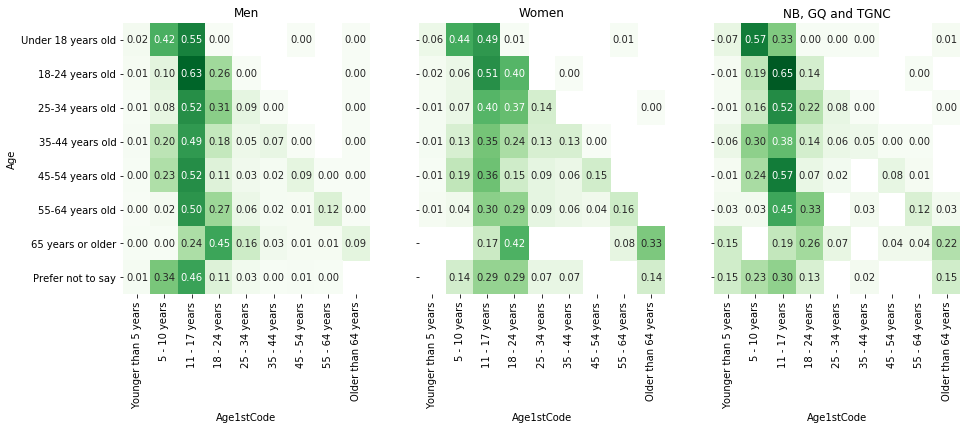

In [37]:
fig, axes = plt.subplots(ncols=3,sharey=True, figsize=(15,5))
sns.heatmap(age_m_dfp, annot=True, fmt='.2f', cmap='Greens', vmin=0, vmax=0.7, ax=axes[0], cbar=False)
sns.heatmap(age_w_dfp, annot=True, fmt='.2f', cmap='Greens', vmin=0, vmax=0.7, ax=axes[1], cbar=False)
sns.heatmap(age_nb_dfp, annot=True, fmt='.2f', cmap='Greens', vmin=0, vmax=0.7, ax=axes[2], cbar=False)
axes[0].title.set_text('Men')
axes[1].title.set_text('Women')
axes[2].title.set_text('NB, GQ and TGNC')
axes[1].set_ylabel('')
axes[2].set_ylabel('');

In this case, the heatmaps above can be used as both visual aid for representation of the data from the previous three tables and as a quick comparison tool of results between different gender identity groups. (It is worth noticing diagonal cut-off line. The upper right area of each heatmap is expectedly empty as for example, respondants of age between 25-34 years could not have written their first code at older age then they are now.)

Across all age groups, the most common age male respondants started coding was between ages 11-17. The second most occurring age range for developing interest in coding amongst men is 18-24 years. <br> 
Comparing these results with female survey respondents, the difference between start of coding at 11-17 years and at 18-24 years is not as pronounced. **This indicates that, compared to men, women are less likely to start coding earlier in life. Interestingly, results for non-binary, gender queer, transgender and non-conforming respondants are more similar to those of men than women.** 

It would be interesting to further investigate the noticed trend and what might be the reason that women are more likely to pick up coding at an older age than men or NB, GQ and TGNC. The questions that arose from this section are:
 -  Are young girls discouraged from expressing interest in programming because boys still make up majority of programming classes/groups (if we were to extrapolate on the findings from the first section)?
 -  Is it because of some underlying societal reason?
 -  How come NB, GQ and TGNC individuals do not seem to be affected by the same reasons?

#### Appendix

Table comparison for some of the other survey questions.

In [38]:
gnd_0_perc = counter(gnd_0, 'Age1stCode')
gnd_m_perc = counter(gnd_m, 'Age1stCode')
gnd_w_perc = counter(gnd_w, 'Age1stCode')
gnd_nb_perc = counter(gnd_nb, 'Age1stCode')

comp_df = pd.merge(gnd_m_perc, gnd_w_perc, left_on='answer', right_on='answer')
comp_df = pd.merge(comp_df, gnd_nb_perc, left_on='answer', right_on='answer')
comp_df = pd.merge(comp_df, gnd_0_perc, left_on='answer', right_on='answer')

sorter=[ 'Younger than 5 years','5 - 10 years','11 - 17 years','18 - 24 years','25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years']
sorterIndex = dict(zip(sorter, range(len(sorter))))

comp_df.columns = ['Age1stCode','Men', 'Women', 'Nonbinary', 'NotDisclosed']
comp_df['Age1stCode_Rank'] = comp_df['Age1stCode'].map(sorterIndex)

comp_df['GenderDiff_MW'] = comp_df['Men'] - comp_df['Women']
comp_df['GenderDiff_MNb'] = comp_df['Men'] - comp_df['Nonbinary']
comp_df['GenderDiff_MND'] = comp_df['Men'] - comp_df['NotDisclosed']
comp_df.sort_values(['Age1stCode_Rank'],ascending = True, inplace = True)
comp_df.drop('Age1stCode_Rank', 1, inplace = True)
comp_df.reset_index(inplace=True, drop=True)

#comp_df.sort_values(by=['GenderDiff_MW'], ignore_index=True, inplace=True, ascending=False)
comp_df.style.bar(subset=['GenderDiff_MW'], align='mid', color=['#fec20c', '#00ab41']).bar(subset=['GenderDiff_MNb'], align='mid', color=['#6a0dad', '#00ab41']).bar(subset=['GenderDiff_MND'], align='mid', color=['#8e8e8e', '#00ab41']).format({'Men': '{:,.2%}'.format,
    'Women': '{:,.2%}'.format,'Nonbinary': '{:,.2%}'.format,'NotDisclosed': '{:,.2%}'.format,'GenderDiff_MW': '{:,.2%}'.format,'GenderDiff_MNb': '{:,.2%}'.format,'GenderDiff_MND': '{:,.2%}'.format,
})

,Age1stCode,Men,Women,Nonbinary,NotDisclosed,GenderDiff_MW,GenderDiff_MNb,GenderDiff_MND
0,Younger than 5 years,0.96%,1.70%,3.20%,2.16%,-0.74%,-2.24%,-1.20%
1,5 - 10 years,13.88%,9.37%,24.07%,18.81%,4.51%,-10.19%,-4.92%
2,11 - 17 years,53.81%,43.01%,50.60%,45.20%,10.80%,3.21%,8.61%
3,18 - 24 years,23.84%,33.93%,15.10%,20.77%,-10.09%,8.74%,3.07%
4,25 - 34 years,4.88%,8.37%,3.88%,5.09%,-3.50%,1.00%,-0.21%
5,35 - 44 years,1.56%,2.09%,0.84%,1.77%,-0.53%,0.72%,-0.22%
6,45 - 54 years,0.65%,0.68%,0.47%,0.81%,-0.03%,0.18%,-0.16%
7,55 - 64 years,0.27%,0.36%,0.52%,0.58%,-0.09%,-0.25%,-0.30%
8,Older than 64 years,0.05%,0.17%,1.00%,0.62%,-0.12%,-0.94%,-0.56%


In [39]:
gnd_0_perc = counter(gnd_0, 'YearsCodeGrouped')
gnd_m_perc = counter(gnd_m, 'YearsCodeGrouped')
gnd_w_perc = counter(gnd_w, 'YearsCodeGrouped')
gnd_nb_perc = counter(gnd_nb, 'YearsCodeGrouped')

comp_df = pd.merge(gnd_m_perc, gnd_w_perc, left_on='answer', right_on='answer')
comp_df = pd.merge(comp_df, gnd_nb_perc, left_on='answer', right_on='answer')
comp_df = pd.merge(comp_df, gnd_0_perc, left_on='answer', right_on='answer')

sorter=['Less than 1 year','1 - 5 years', '6 - 10 years','11 - 20 years', '21 - 50 years','More than 50 years']
sorterIndex = dict(zip(sorter, range(len(sorter))))

comp_df.columns = ['YearsCodeGrouped','Men', 'Women', 'Nonbinary', 'NotDisclosed']
comp_df['YearsCodeGrouped_Rank'] = comp_df['YearsCodeGrouped'].map(sorterIndex)

comp_df['GenderDiff_MW'] = comp_df['Men'] - comp_df['Women']
comp_df['GenderDiff_MNb'] = comp_df['Men'] - comp_df['Nonbinary']
comp_df['GenderDiff_MND'] = comp_df['Men'] - comp_df['NotDisclosed']
comp_df.sort_values(['YearsCodeGrouped_Rank'],ascending = True, inplace = True)
comp_df.drop('YearsCodeGrouped_Rank', 1, inplace = True)
comp_df.reset_index(inplace=True, drop=True)

#comp_df.sort_values(by=['GenderDiff_MW'], ignore_index=True, inplace=True, ascending=False)
comp_df.style.bar(subset=['GenderDiff_MW'], align='mid', color=['#fec20c', '#00ab41']).bar(subset=['GenderDiff_MNb'], align='mid', color=['#6a0dad', '#00ab41']).bar(subset=['GenderDiff_MND'], align='mid', color=['#8e8e8e', '#00ab41']).format({'Men': '{:,.2%}'.format,
    'Women': '{:,.2%}'.format,'Nonbinary': '{:,.2%}'.format,'NotDisclosed': '{:,.2%}'.format,'GenderDiff_MW': '{:,.2%}'.format,'GenderDiff_MNb': '{:,.2%}'.format,'GenderDiff_MND': '{:,.2%}'.format,
})

,YearsCodeGrouped,Men,Women,Nonbinary,NotDisclosed,GenderDiff_MW,GenderDiff_MNb,GenderDiff_MND
0,Less than 1 year,1.57%,4.54%,2.99%,2.74%,-2.97%,-1.42%,-1.17%
1,1 - 5 years,24.38%,32.74%,24.80%,25.39%,-8.36%,-0.42%,-1.01%
2,6 - 10 years,29.02%,33.30%,31.25%,23.78%,-4.28%,-2.24%,5.24%
3,11 - 20 years,26.07%,19.54%,22.97%,20.08%,6.54%,3.11%,6.00%
4,21 - 50 years,16.95%,7.48%,14.58%,16.22%,9.48%,2.37%,0.73%
5,More than 50 years,0.17%,0.19%,1.10%,0.58%,-0.03%,-0.93%,-0.41%


In [40]:
list(df.Age.value_counts().index)

['25-34 years old',
 '18-24 years old',
 '35-44 years old',
 '45-54 years old',
 'Under 18 years old',
 '55-64 years old',
 'Prefer not to say',
 '65 years or older']